In [21]:
#Importing Libraries needed 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [22]:
# Load the weather data
weather_data = pd.read_csv('DataSet\weatherData.csv')

# Load the location data
location_data = pd.read_csv('DataSet\locationData.csv')

# Display the first few rows of each dataframe
print(weather_data.head())
print(location_data.head())


   location_id      date  weather_code (wmo code)  temperature_2m_max (°C)  \
0            0  1/1/2010                        1                     30.1   
1            0  1/2/2010                       51                     30.1   
2            0  1/3/2010                       51                     29.6   
3            0  1/4/2010                        2                     28.9   
4            0  1/5/2010                        1                     28.1   

   temperature_2m_min (°C)  temperature_2m_mean (°C)  \
0                     22.6                      26.0   
1                     23.7                      26.3   
2                     23.1                      26.0   
3                     23.1                      25.7   
4                     21.3                      24.6   

   apparent_temperature_max (°C)  apparent_temperature_min (°C)  \
0                           34.5                           25.0   
1                           33.9                           2

In [23]:
#Explore the Data
print(weather_data.info())
print(weather_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142371 entries, 0 to 142370
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   location_id                      142371 non-null  int64  
 1   date                             142371 non-null  object 
 2   weather_code (wmo code)          142371 non-null  int64  
 3   temperature_2m_max (°C)          142371 non-null  float64
 4   temperature_2m_min (°C)          142371 non-null  float64
 5   temperature_2m_mean (°C)         142371 non-null  float64
 6   apparent_temperature_max (°C)    142371 non-null  float64
 7   apparent_temperature_min (°C)    142371 non-null  float64
 8   apparent_temperature_mean (°C)   142371 non-null  float64
 9   daylight_duration (s)            142371 non-null  float64
 10  sunshine_duration (s)            142371 non-null  float64
 11  precipitation_sum (mm)           142371 non-null  float64
 12  ra

## Data Cleaning and Preprocessing

In [24]:
#Handle Missing Data:
weather_data.fillna(method='ffill', inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_6648\408332572.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_data.fillna(method='ffill', inplace=True)


In [25]:
#Merge the DataFrames
merged_data = pd.merge(weather_data, location_data, how='inner', on='location_id')


In [26]:
#Verify the Merged Data
print(merged_data.head())


   location_id      date  weather_code (wmo code)  temperature_2m_max (°C)  \
0            0  1/1/2010                        1                     30.1   
1            0  1/2/2010                       51                     30.1   
2            0  1/3/2010                       51                     29.6   
3            0  1/4/2010                        2                     28.9   
4            0  1/5/2010                        1                     28.1   

   temperature_2m_min (°C)  temperature_2m_mean (°C)  \
0                     22.6                      26.0   
1                     23.7                      26.3   
2                     23.1                      26.0   
3                     23.1                      25.7   
4                     21.3                      24.6   

   apparent_temperature_max (°C)  apparent_temperature_min (°C)  \
0                           34.5                           25.0   
1                           33.9                           2

In [32]:
#Convert date columns to datetime type
weather_data['date'] = pd.to_datetime(weather_data['date'])


In [28]:
#Extract features from the date column, such as day, month, year, or seasonal trends.
weather_data['month'] = weather_data['date'].dt.month
weather_data['year'] = weather_data['date'].dt.year


In [29]:
# Checking for missing values
print(merged_data.isnull().sum())

# Fill or drop missing values if necessary
merged_data = merged_data.dropna()  # or merged_data.fillna(value)


location_id                        0
date                               0
weather_code (wmo code)            0
temperature_2m_max (°C)            0
temperature_2m_min (°C)            0
temperature_2m_mean (°C)           0
apparent_temperature_max (°C)      0
apparent_temperature_min (°C)      0
apparent_temperature_mean (°C)     0
daylight_duration (s)              0
sunshine_duration (s)              0
precipitation_sum (mm)             0
rain_sum (mm)                      0
precipitation_hours (h)            0
wind_speed_10m_max (km/h)          0
wind_gusts_10m_max (km/h)          0
wind_direction_10m_dominant (°)    0
shortwave_radiation_sum (MJ/m²)    0
et0_fao_evapotranspiration (mm)    0
sunrise                            0
sunset                             0
latitude                           0
longitude                          0
elevation                          0
utc_offset_seconds                 0
timezone                           0
timezone_abbreviation              0
c

In [30]:
#Basic Statistical Summary
print(merged_data.describe())


         location_id  weather_code (wmo code)  temperature_2m_max (°C)  \
count  142371.000000            142371.000000            142371.000000   
mean       13.000000                44.891586                29.295854   
std         7.788908                22.840879                 3.352774   
min         0.000000                 0.000000                14.100000   
25%         6.000000                51.000000                27.700000   
50%        13.000000                53.000000                29.300000   
75%        20.000000                61.000000                31.300000   
max        26.000000                65.000000                40.300000   

       temperature_2m_min (°C)  temperature_2m_mean (°C)  \
count            142371.000000             142371.000000   
mean                 23.120601                 25.730017   
std                   3.165760                  2.954064   
min                   5.300000                 12.100000   
25%                  22.000000   

## Data Visualization 

#### Correlation Heatmap 
Visualize relationships between variables to understand which ones influence temperature the most.

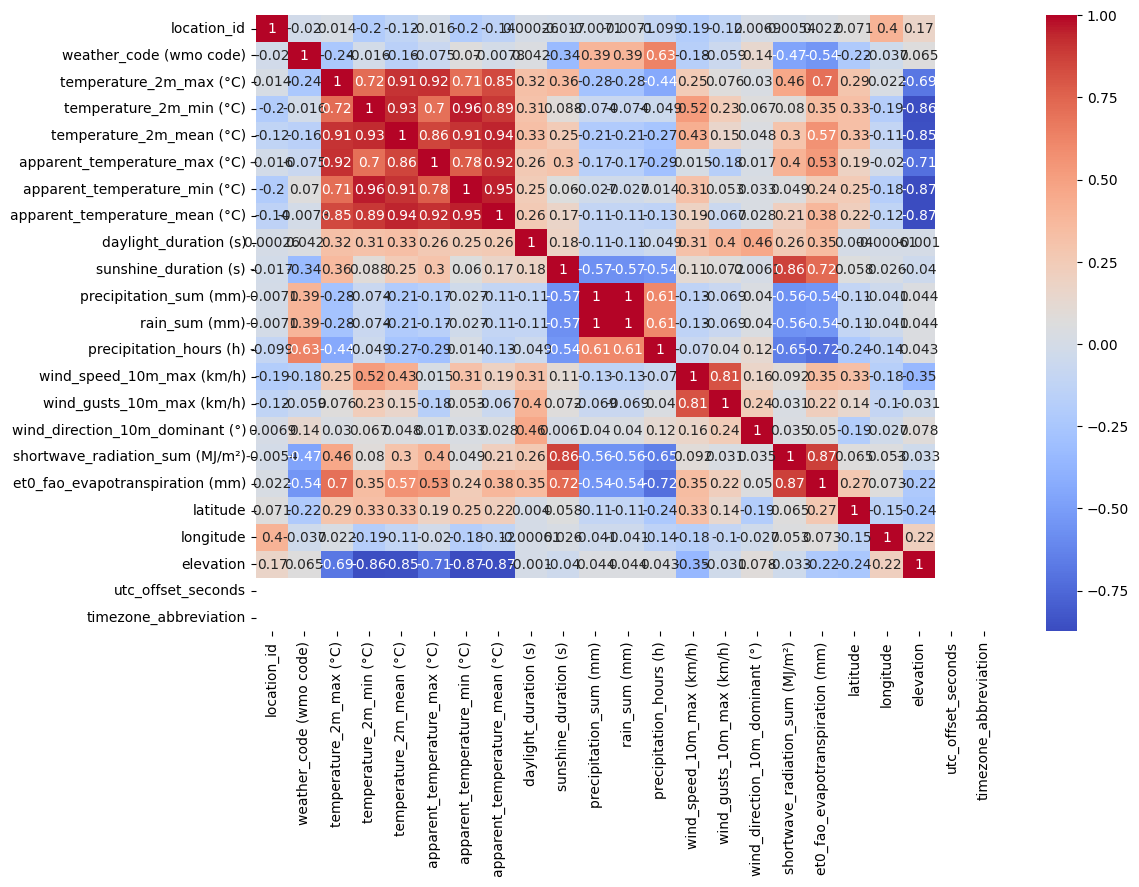

In [34]:
# Selecting only numerical columns for the correlation matrix
numerical_columns = merged_data.select_dtypes(include=['float64', 'int64'])

# Create the correlation matrix
plt.figure(figsize=(12,8))
correlation_matrix = numerical_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


#### Time Series Plot

Plot the temperature over time to see the trend in the data (seasonality or patterns).

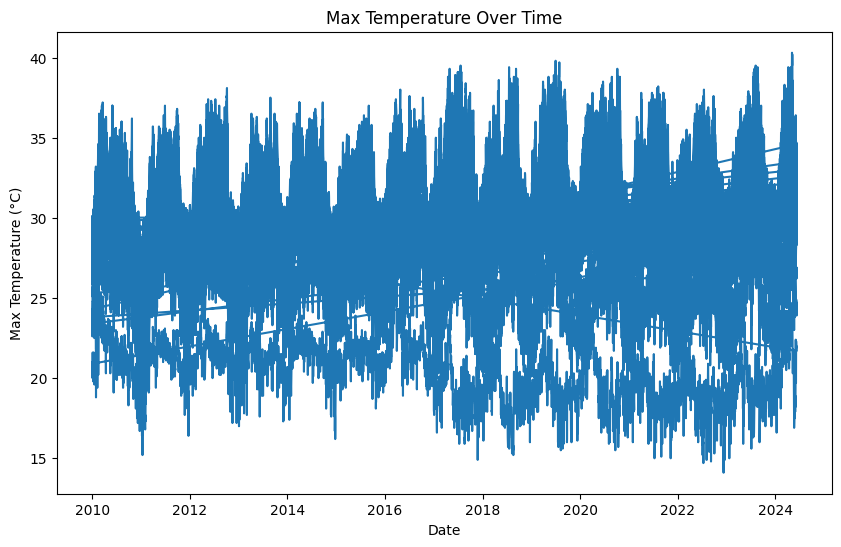

In [35]:
#Create Time Series Plot
merged_data['date'] = pd.to_datetime(merged_data['date'])
plt.figure(figsize=(10,6))
plt.plot(merged_data['date'], merged_data['temperature_2m_max (°C)'])
plt.title('Max Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Max Temperature (°C)')
plt.show()
